In [1]:
import matplotlib.pyplot as plt
import LoadFiles as lF
import numpy as np
import nltk
from nltk.stem.porter import *
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

data, Y = lF.loadLabeled("./Data/train")
stopwords = stopwords.words('english')
stemmer = SnowballStemmer("english")

AttributeError: 'module' object has no attribute 'loadLabeled'

In [ ]:
print stopwords

In [201]:
words = ['br',"n't","''","```","'s","...","``","'ll"]
                                   
# For each document in the dataset, do the preprocessing
for doc_id, text in enumerate(data):
    
    #On decode un peu le bordel
    doc = nltk.word_tokenize(text.decode('utf-8').lower())

    #On enlève la ponctuation
    punctuation = set(string.punctuation)
    doc = [w for w in doc if w not in punctuation]
    
    #On enlève les stopwords
    doc = [w for w in doc if w not in stopwords]
    doc = [w for w in doc if w not in words]
    
    s = " ";
    doc = s.join(doc)
    #On stemme un peu tout ça
    #doc = [stemmer.stem(w) for w in doc]
    data[doc_id]=doc

In [202]:
m = TfidfVectorizer()
tfidf_matrix = m.fit_transform(data)
tfidf_matrix = tfidf_matrix.toarray() 
print "Size of TF-IDF matrix: ", tfidf_matrix.shape    
print "Sparsity of the TF_IDF matrix: ", float(np.count_nonzero(tfidf_matrix)) / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])

Size of TF-IDF matrix:  (602, 11864)
Sparsity of the TF_IDF matrix:  0.00799411603937


             precision    recall  f1-score   support

        0.0       0.74      0.96      0.83        81
        1.0       0.96      0.72      0.82       100

avg / total       0.86      0.83      0.83       181

The accuracy score is 82.87%
Area under the ROC curve : 0.943457


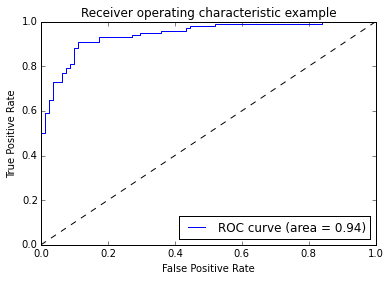

In [203]:
# On test sur 40 %
data_train, data_test, labels_train, labels_test = cross_validation.train_test_split(\
        tfidf_matrix, Y, test_size=0.3, random_state=42)

#Classifier : Bernoulli :

clf = LogisticRegression().fit(data_train,labels_train)
y_score = clf.fit(data_train, labels_train).predict_proba(data_test)
labels_predicted = clf.predict(data_test)   
       
# Evaluation of the prediction
print classification_report(labels_test, labels_predicted)
print "The accuracy score is {:.2%}".format(accuracy_score(labels_test, labels_predicted))
    
# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(labels_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc
    
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()